# Chapter 4
## Pre-trained MobileNet based Tensorflow
## Width reduction and quantization

In [1]:
import tensorflow as tf
print ('TesnsorFlow version:', tf.__version__)
print ('Keras version: ', tf.keras.__version__)

TesnsorFlow version: 1.13.1
Keras version:  2.2.4-tf


In [2]:
# Load test images
from glob import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

images = glob('test_images/*.jpg')

# View an example of an image
# example = mpimg.imread(images[0])
# plt.imshow(example)
# plt.show()
# print('Showing example image, image dimensions: ', example.shape)

In [3]:
# This will download a new version of MobileNet as needed
from tensorflow.keras.applications.mobilenet import MobileNet, decode_predictions
model_mnet = None

def mnet_predict(img, w_scale):
    global model_mnet
    
    # Load the pre-trained model
    if not model_mnet:
        model_mnet = MobileNet(weights='imagenet', alpha=w_scale)

    # Perform inference on our pre-processed image
    predictions = model_mnet.predict(img)

    return decode_predictions(predictions, top=3)[0]

In [4]:
# # Here, we'll load an image and pre-process it
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np

def mnet_process(w_scale):
    for i in range (len(images)):
        img_path = images[i]
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        results = mnet_predict(x, w_scale)
        example = mpimg.imread(img_path)
        plt.imshow(example) 
        plt.show()
        print('Prediction Results: ', results[0][1:], results[1][1:], results[2][1:])

In [5]:
def to_quantized_tflite(network_name):
# For tensorflow versions <= 1.12 lite is in contrib. For later versions of tensorflow use it 
# directly from tf.
    converter = None
    if (tf.__version__ <= "1.12.0"):
        converter = tf.contrib.lite.TFLiteConverter.from_keras_model_file(network_name + ".h5")
        #converter.optimizations = [tf.contrib.lite.Optimize.OPTIMIZE_FOR_SIZE]
        converter.post_training_quantize = true
    else:
        converter = tf.lite.TFLiteConverter.from_keras_model_file(network_name + ".h5")
        #converter.optimizations = [tf.lite.constants.QUANTIZED_UINT8]
        converter.post_training_quantize = True
    
    tfmodel   = converter.convert()
    
    try:
        fd = open(network_name + "_quantized" + ".tflite", "wb")
        fd.write(tfmodel)
        fd.flush()
        fd.close()
    except:
        print("Error in file i/o: ")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


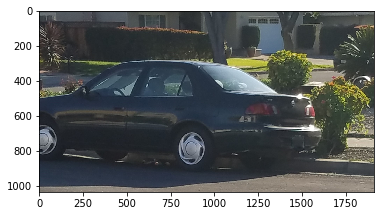

Prediction Results:  ('minivan', 0.3897298) ('car_wheel', 0.31736553) ('pickup', 0.16463622)


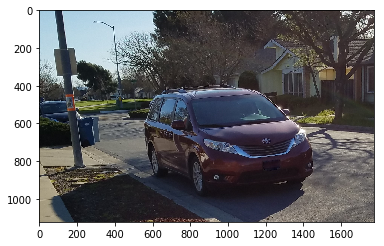

Prediction Results:  ('minivan', 0.7218515) ('cab', 0.061791744) ('car_wheel', 0.043327365)


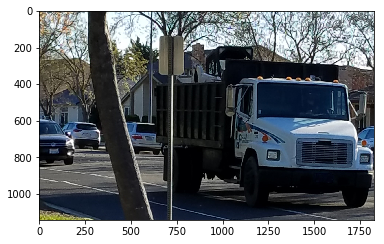

Prediction Results:  ('garbage_truck', 0.895164) ('trailer_truck', 0.037415247) ('tow_truck', 0.026065333)


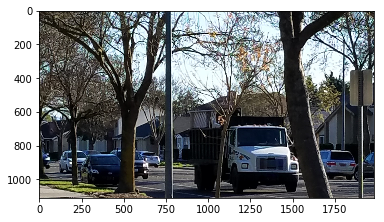

Prediction Results:  ('swing', 0.3209976) ('streetcar', 0.20360132) ('garbage_truck', 0.079866126)


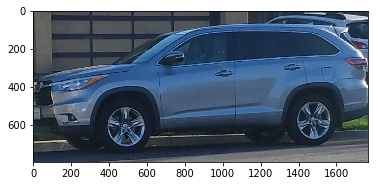

Prediction Results:  ('minivan', 0.6561169) ('beach_wagon', 0.3080324) ('car_wheel', 0.01910816)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_____________________________________________

Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 137 variables.
INFO:tensorflow:Converted 137 variables to const ops.
Mnet alpha 1, quantized...


In [6]:
# Model alpha / network width = 1
network_name = "mnet_imagenet_1"
model_mnet = None
w_scale = 1
mnet_process(w_scale)
model_mnet.save(network_name + ".h5")
model_mnet.summary()
to_quantized_tflite(network_name)
print ("Mnet alpha 1, quantized...")

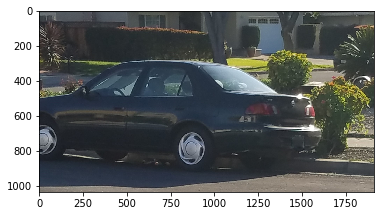

Prediction Results:  ('beach_wagon', 0.26221633) ('pickup', 0.19655548) ('racer', 0.13990727)


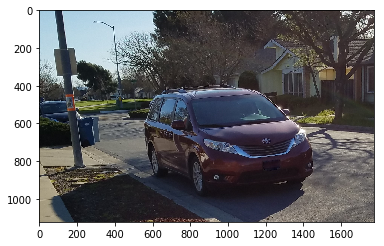

Prediction Results:  ('minivan', 0.34460202) ('mountain_tent', 0.0932404) ('sleeping_bag', 0.046265762)


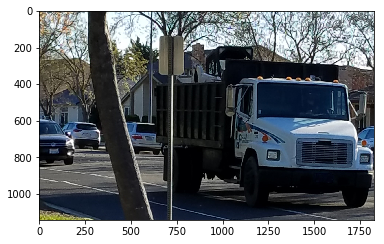

Prediction Results:  ('trailer_truck', 0.3458458) ('moving_van', 0.28404364) ('garbage_truck', 0.11220882)


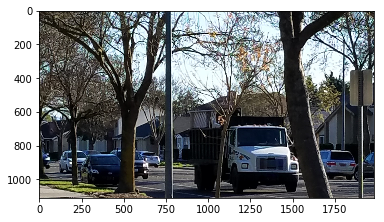

Prediction Results:  ('minibus', 0.15235732) ('moving_van', 0.12263604) ('streetcar', 0.111988574)


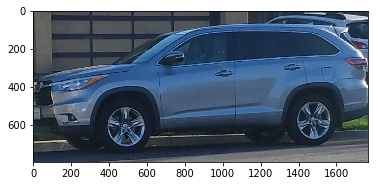

Prediction Results:  ('car_wheel', 0.41940242) ('minivan', 0.16353795) ('beach_wagon', 0.09946188)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 16)      432       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 16)      64        
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 16)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 16)      144       
___________________________________________

INFO:tensorflow:Froze 137 variables.
INFO:tensorflow:Converted 137 variables to const ops.
Mnet alpha 0.5, quantized...


In [7]:
# Model alpha / network width = 0.5
network_name = "mnet_imagenet_50"
model_mnet = None
w_scale = 0.5
mnet_process(w_scale)
model_mnet.save(network_name + ".h5")
model_mnet.summary()
to_quantized_tflite(network_name)
print ("Mnet alpha 0.5, quantized...")

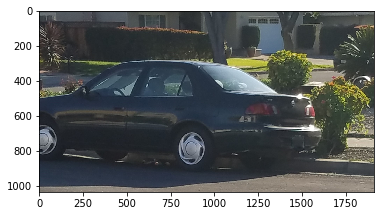

Prediction Results:  ('minivan', 0.22832395) ('tow_truck', 0.11648597) ('tank', 0.10326967)


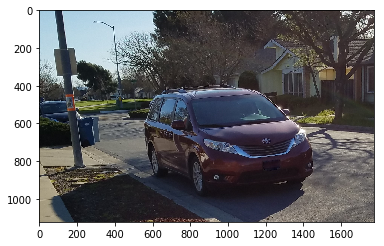

Prediction Results:  ('canoe', 0.18426336) ('barrow', 0.067627825) ('stretcher', 0.06384706)


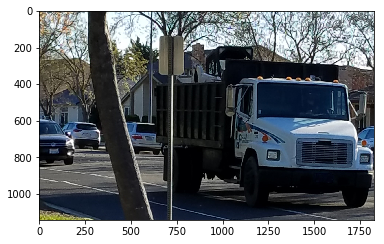

Prediction Results:  ('trolleybus', 0.6292785) ('police_van', 0.105024576) ('minibus', 0.093115054)


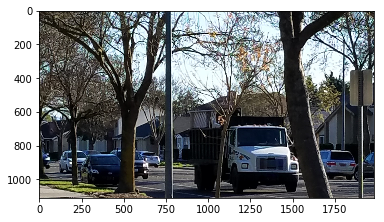

Prediction Results:  ('trolleybus', 0.27266547) ('streetcar', 0.21413332) ('minibus', 0.06565762)


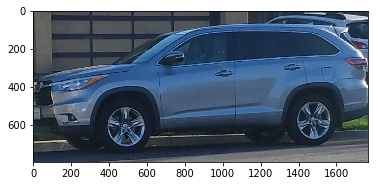

Prediction Results:  ('pickup', 0.48388192) ('car_wheel', 0.10931451) ('beach_wagon', 0.09553622)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 8)       216       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 8)       32        
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 8)       0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 8)       72        
____________________________________________

INFO:tensorflow:Froze 137 variables.
INFO:tensorflow:Converted 137 variables to const ops.
Mnet alpha 0.25, quantized...


In [8]:
# Model alpha / network width = 0.25
network_name = "mnet_imagenet_25"
model_mnet = None
w_scale = 0.25
mnet_process(w_scale)
model_mnet.save(network_name + ".h5")
model_mnet.summary()
to_quantized_tflite(network_name)
print ("Mnet alpha 0.25, quantized...")

In [3]:
%%bash
ls -s *.h5 *.tflite

16872 mnet_imagenet_1.h5
 4180 mnet_imagenet_1_quantized.tflite
 2112 mnet_imagenet_25.h5
  492 mnet_imagenet_25_quantized.tflite
 5500 mnet_imagenet_50.h5
 1336 mnet_imagenet_50_quantized.tflite


In [10]:
# Ratio of max / min model sizes (in KB)
compression_ratio = 16872 / 492
print ("Max compression Ratio: ", int(compression_ratio), " times")

Max compression Ratio:  34  times
